https://github.com/qiskit-community/ibm-quantum-challenge-2024/tree/main

In [ ]:
### Install Qiskit, if needed

!pip install qiskit[visualization]==1.0.2
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install prototype-zne
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=303cca3f302cf6002a1e3673f825d6c628db7363c364cdb9a2689b715b83d42b
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
#You just need to run this code in a Google colab notebook to install Qiskit.

!pip install qiskit ipywidgets


In [ ]:
### CHECK QISKIT VERSION
import qiskit
qiskit.__version__

'1.0.2'

In [ ]:
### CHECK OTHER DEPENDENCIES
!pip show pylatexenc matplotlib qc_grader

#qc-grader should be 0.18.8 (or higher)


Name: pylatexenc
Version: 2.10
Summary: Simple LaTeX parser providing latex-to-unicode and unicode-to-latex conversion
Home-page: https://github.com/phfaist/pylatexenc
Author: Philippe Faist
Author-email: philippe.faist@bluewin.ch
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 
---
Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.10/dist-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, bigframes, datascience, fastai, geemap, imgaug, matplotlib-venn, missingno, mizani, mlxtend, music21, plotnine, prophet, pycocotools, seaborn, wordcloud, yellowbrick
---
Name: qc-grader
Version: 0.18.8
Summary: Grading client for the IBM Quantum Challenge
Home-page: https://quantum.ibm.com/
Author: IBM Q

In [ ]:
# Save your API token to track your progress

%set_env QXToken=token

# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=token


In [ ]:
# imports
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

In [ ]:
# Setup the grader
from qc_grader.challenges.iqc_2024 import (
    grade_lab1_ex1,
    grade_lab1_ex2,
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6,
    grade_lab1_ex7,
)

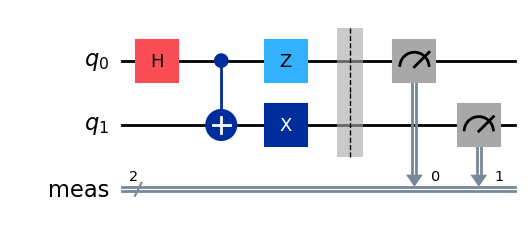

In [ ]:
# Build a circuit to form a psi-minus Bell state
# Apply gates to the provided QuantumCircuit, qc

qc = QuantumCircuit(2)

### Write your code below here ###

# psi-minus bell state = 1/sqrt(2) ket(01) - 1/sqrt(2) ket(10)
#Hint: The Bell state uses a single Z gate, and a single X gate, both of which occur after the CNOT.
# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a CNOT gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Perform a single Z gate on qubit 0
qc.z(0)

# Perform a single X gate on qubit 1
qc.x(1)

### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

In [ ]:
# Submit your answer using following code

grade_lab1_ex1(qc) # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
qc.measure_all()

### Write your code below here ###


sampler = StatevectorSampler()
pub = qc
job_sampler = sampler.run([pub], shots=2)



### Don't change any code past this line ###

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'01': 1, '10': 1}


In [ ]:
# Submit your answer using following code

grade_lab1_ex2(job_sampler) # Expected result type: PrimitiveJob

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


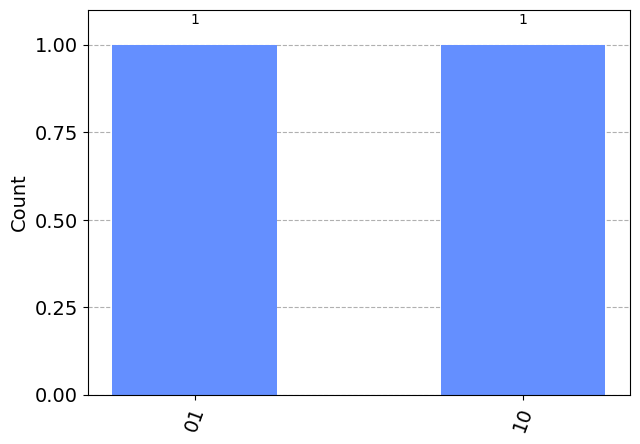

In [ ]:
plot_histogram(counts_sampler)


Exercise 3: Create and draw a W-state circuit

Next, we will develop a slightly more complicated circuit. Similarly to Bell states circuit producing Bell states, W-state circuits produce W states. Although Bell states entangle two qubits, W-states entangle three qubits. To build our W-state, we will follow 6 simple steps:

Initialize our 3 qubit circuit
Perform an Ry rotation on our qubit. The specifics of this operation are provided.
Perform a controlled hadamard gate on qubit 1, with control qubit 0
Add a CNOT gate with control qubit 1 and target qubit 2
Add a CNOT gate with control qubit 0 and target qubit 1
Add a X gate on qubit 0
Your Task: Follow the steps to build the W-state circuit

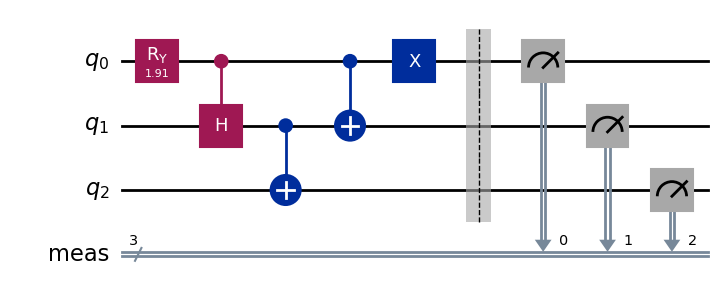

In [ ]:
# Step 1 Initialize our 3 qubit circuit

#your_code_here
qc = QuantumCircuit(3)

# Step 2 (provided) Perform an Ry rotation on our qubit. The specifics of this operation are provided.
qc.ry(1.91063324, 0)

# Add steps 3-6 below
#Perform a controlled hadamard gate on qubit 1, with control qubit 0
qc.ch(0,1)
#Add a CNOT gate with control qubit 1 and target qubit 2
qc.cx(1, 2)
#Add a CNOT gate with control qubit 0 and target qubit 1
qc.cx(0, 1)
#Add a X gate on qubit 0
qc.x(0)



### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

In [ ]:
# Submit your answer using following code

grade_lab1_ex3(qc) # Expected result type: # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'100': 3394, '001': 3307, '010': 3299}


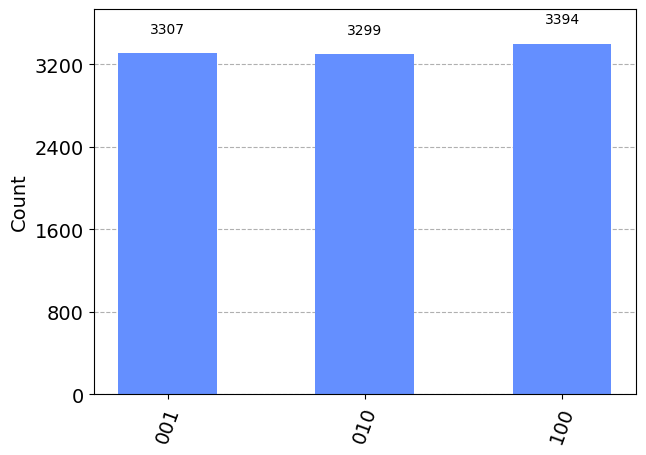

In [ ]:
plot_histogram(counts_sampler)


In [ ]:
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
print(pauli_op.to_matrix())

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -3.+0.j]]


Executing a VQE algorithm requires these three steps:

Setting up the Hamiltonian and ansatz (problem specification)
Implementing the Qiskit Runtime estimator
Adding the Classical optimizer and running our program

Exercise 4: Create a parameterized circuit to serve as the ansatz

Our first task will be to set up our ansatz, or a trial solution, for our problem which we will compare against.

For this we can use Qiskit's TwoLocal circuit, a pre-built circuit that can be used to prepare trial wave functions for variational quantum algorithms or classification circuits for machine learning. TwoLocal circuits are parameterized circuits consisting of alternating rotation layers and entanglement layers. You can find more information about them in Qiskit's documentation.

Your Task: Set up a 3-qubit TwoLocal circuit using Ry and Rz rotations. Entanglement should be set to full, and entanglement blocks should use the Cz gate. Make sure you set reps=1 and insert_barriers=True.

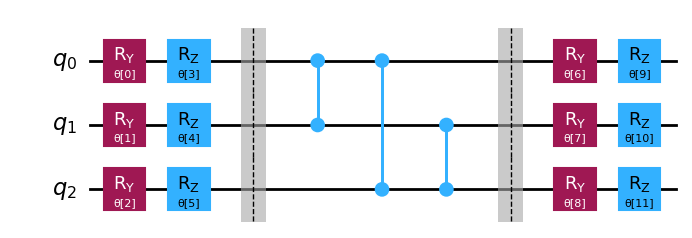

In [ ]:
num_qubits = 3 #Add your code here
rotation_blocks = ['ry','rz'] #Add your code here
entanglement_blocks = 'cz' #Add your code here
entanglement = 'full' #Add your code here

#two = TwoLocal(3, ['ry','rz'], 'cz', 'full', reps=1, insert_barriers=True)

ansatz = TwoLocal(num_qubits, rotation_blocks, entanglement_blocks, entanglement, reps=1, insert_barriers=True)
#Add your code here
#reps=1 and insert_barriers=True

### Don't change any code past this line ###
ansatz.decompose().draw('mpl')

In [ ]:
# Submit your answer using following code

grade_lab1_ex4(num_qubits, rotation_blocks, entanglement_blocks, entanglement) # Expected result type: int, List[str], str, str

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
num_params = ansatz.num_parameters
num_params

12

Exercise 5: Transpile to ISA circuits

In this example we will use the FakeSherbrooke, a fake (simulated) 127-qubit backend, useful for testing the transpiler and other backend-facing functionalities.

Preset pass managers are the default pass managers used by the transpile() function. transpile() provides a convenient and simple method to construct a standalone PassManager object that mirrors what the transpile function does when optimizing and transforming a quantum circuit for execution on a specific backend.

Your Task: Define the pass manager. Reference the Qiskit documentation for more info.

Tip: Make sure you are using the right backend!

The grader was designed with FakeSherbrooke in mind, and therefore is expecting a 127 qubit map. If you use another backend you might encounter issues.

In [ ]:
backend_answer = FakeSherbrooke() #Add your code
optimization_level_answer = 1 #Add your code
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)

'''
generate_preset_pass_manager(optimization_level, backend=None, target=None, basis_gates=None,
  inst_map=None, coupling_map=None, instruction_durations=None, backend_properties=None, timing_constraints=None,
  initial_layout=None, layout_method=None, routing_method=None, translation_method=None, scheduling_method=None,
  approximation_degree=None, seed_transpiler=None, unitary_synthesis_method='default', unitary_synthesis_plugin_config=None,
  hls_config=None, init_method=None, optimization_method=None)
'''

isa_circuit = pm.run(ansatz) # Add your code
'''
# Transpile the circuit
transpiled_circuit = transpile(qc, backend=backend, pass_manager=pass_manager)

# Print the transpiled circuit
print(transpiled_circuit)
'''

'\n# Transpile the circuit\ntranspiled_circuit = transpile(qc, backend=backend, pass_manager=pass_manager)\n\n# Print the transpiled circuit\nprint(transpiled_circuit)\n'

In [ ]:
# Submit your answer using following code

grade_lab1_ex5(isa_circuit) # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


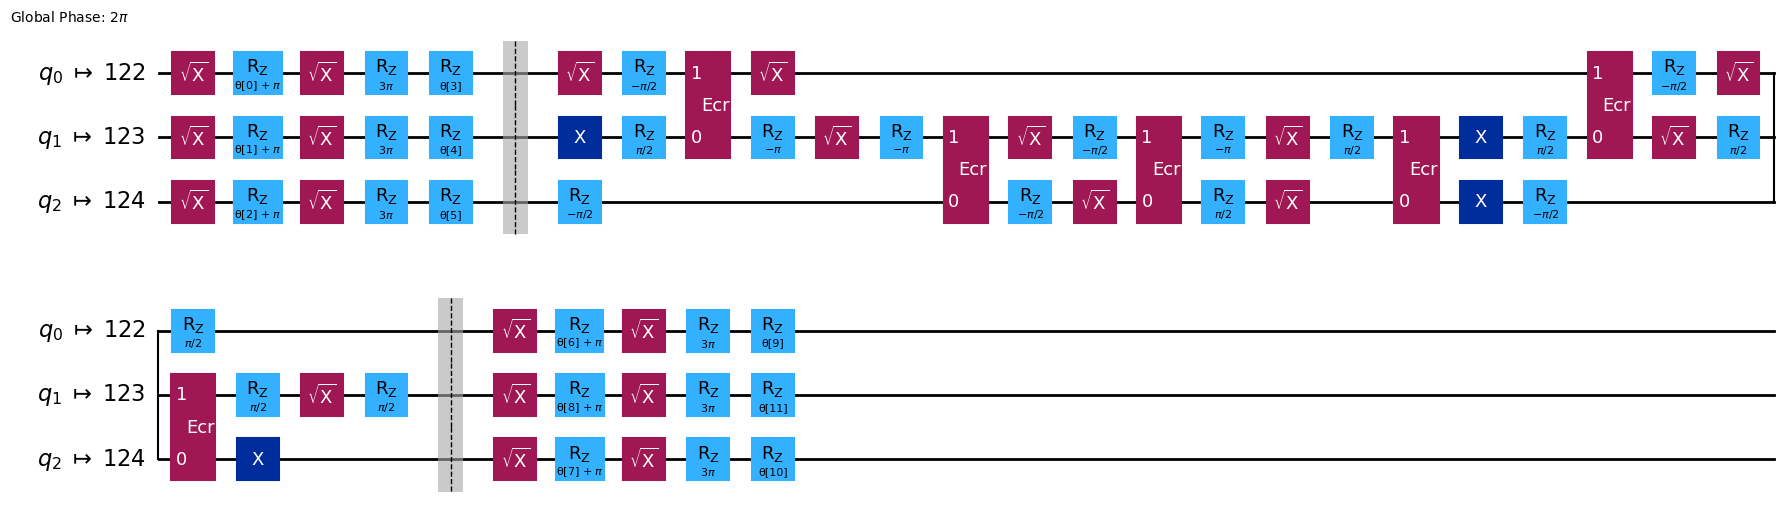

In [ ]:
isa_circuit.draw('mpl', idle_wires=False,)


In [ ]:
# Define our Hamiltonian
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

Tip: For the following two exercises make sure you are working with Qiskit 1.0.2!

You can download this version using: !pip install qiskit==1.0.2

In [ ]:
!pip install qiskit==1.0.2

Exercise 6: Defining the cost function

Like many classical optimization problems, the solution to a VQE problem can be formulated as minimization of a scalar cost function. The cost function for our VQE is simple: the energy!

Your Task: Define a cost function by using Qiskit Runtime Estimator to find the energy for a given parameterized state and our Hamiltonian.

In [ ]:
def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, hamiltonian, params)
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs

    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = params
    callback_dict["cost_history"].append(energy)


### Don't change any code past this line ###
    print(energy)
    return energy, result

In [ ]:
# Submit your answer using following code

grade_lab1_ex6(cost_func) # Expected result type: Callable

[0.68115234]
Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [ ]:
x0 = 2 * np.pi * np.random.random(num_params)
x0

array([0.42222186, 1.55020001, 4.69939724, 5.18308833, 4.82952667,
       3.96898744, 2.15650994, 1.39499872, 3.23614974, 4.2028763 ,
       2.86376503, 3.64571393])

Exercise 7: QiskitRuntimeService V2 Primitives, local testing mode and Sessions, a first look

Next, we will use the new QiskitRuntimeService V2 primitives: EstimatorV2 and SamplerV2.

The new Estimator interface lets you specify a single circuit and multiple observables and parameter value sets for that circuit, so that sweeps over parameter value sets and observables can be efficiently specified. Previously, you had to specify the same circuit multiple times to match the size of the data to be combined. Also, while you can still use optimization_level and resilience_level as the simple knobs, V2 primitives give you the flexibility to turn on or off individual error mitigation / suppression methods to customize them for your needs.

SamplerV2 is simplified to focus on its core task of sampling the quantum register from the execution of quantum circuits. It returns the samples, whose type is defined by the program, without weights. The output data is also separated by the output register names defined by the program. This change enables future support for circuits with classical control flow.

We will also use Qiskit's 1.0 local testing mode. Local testing mode (available with qiskit-ibm-runtime 0.22.0 or later) can be used to help develop and test programs before fine-tuning them and sending them to real quantum hardware.

Your Task: After using local testing mode to verify your program, all you need to do is change the backend name to run it on an IBM Quantum system.

In [ ]:
### Select a Backend
## Use FakeSherbrooke to simulate with noise that matches closer to the real experiment. This will run slower.
## Use AerSimulator to simulate without noise to quickly iterate. This will run faster.

#backend = FakeSherbrooke()
backend = AerSimulator()

# ### Don't change any code past this line ###

# Here we have updated the cost function to return only the energy to be compatible with recent scipy versions (>=1.10)
def cost_func_2(*args, **kwargs):
    energy, result = cost_func(*args, **kwargs)
    return energy

with Session(backend=backend) as session:
    estimator = Estimator(session=session)

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, hamiltonian_isa, estimator, callback_dict),
        method="cobyla",
        options={'maxiter': 100})



-0.47119140625
-0.02734375
-0.70947265625
-1.505859375
-1.3466796875
-1.76806640625
-1.75634765625
-2.25390625
-1.404296875
-2.08154296875
-2.2998046875
-2.26513671875
-2.26513671875
-2.869140625
-2.5302734375
-2.88671875
-2.25341796875
-2.90380859375
-2.1123046875
-2.8876953125
-2.5732421875
-2.73486328125
-2.7568359375
-2.88427734375
-2.90087890625
-2.90087890625
-2.62548828125
-2.8720703125
-2.83984375
-2.859375
-2.83349609375
-2.89892578125
-2.87890625
-2.89892578125
-2.921875
-2.92724609375
-2.931640625
-2.9384765625
-2.9453125
-2.95654296875
-2.9541015625
-2.947265625
-2.962890625
-2.951171875
-2.970703125
-2.9765625
-2.96484375
-2.966796875
-2.96484375
-2.9833984375
-2.982421875
-2.97412109375
-2.9853515625
-2.984375
-2.97314453125
-2.9794921875
-2.970703125
-2.9765625
-2.99169921875
-2.9736328125
-2.9951171875
-2.978515625
-2.98828125
-2.9912109375
-2.9912109375
-2.98583984375
-2.98974609375
-2.98974609375
-2.9921875
-2.98828125
-2.99267578125
-2.98974609375
-2.97998046875
-2.9

In [ ]:
# Submit your answer using following code

grade_lab1_ex7(res) # Expected result type: OptimizeResult

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Tip: Increase maxiter if you do not see convergence

If the cost is not converging, increase the maxiter (100 is an appropriate number) and run Ex 7 again.

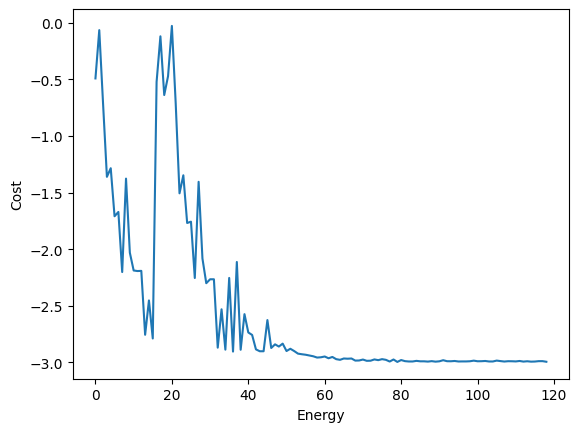

In [ ]:
fig, ax = plt.subplots()
plt.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
plt.xlabel("Energy")
plt.ylabel("Cost")
plt.draw()